In [8]:
import pandas as pd
df=pd.read_csv("fruits.csv")
df.head()
df.shape

(40, 3)

In [9]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# le = LabelEncoder()
# mm = MinMaxScaler()
# df["Class"]=le.fit_transform(df["Class"])
# # for i in ["Weight","Size"]:
# #     df[i] = mm.fit_transform(df[[i]])
# df[["Weight","Size"]] = mm.fit_transform(df[["Weight","Size"]])

In [10]:
y = df["Class"]
x = df[["Weight","Size"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle=True,random_state=1,train_size=0.80)

In [11]:
from sklearn.tree import DecisionTreeClassifier as dt
dt = dt()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
print("training accuracy is ",dt.score(xtrain,ytrain))

training accuracy is  1.0


In [13]:
print("Test Accuracy =",dt.score(xtest,ytest))

Test Accuracy = 1.0


In [14]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=['Weight','Size']))

|--- Size <= 4.97
|   |--- class: orange
|--- Size >  4.97
|   |--- class: apple



In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain, ytrain)


DecisionTreeClassifier(criterion='entropy')

In [16]:
print("training accuracy is ",dt.score(xtrain,ytrain))
print("Test Accuracy =",dt.score(xtest,ytest))

training accuracy is  1.0
Test Accuracy = 0.75


[Text(0.5, 0.75, 'Weight <= 69.5\nentropy = 0.997\nsamples = 32\nvalue = [17, 15]\nclass = Apple'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Orange'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = Apple')]

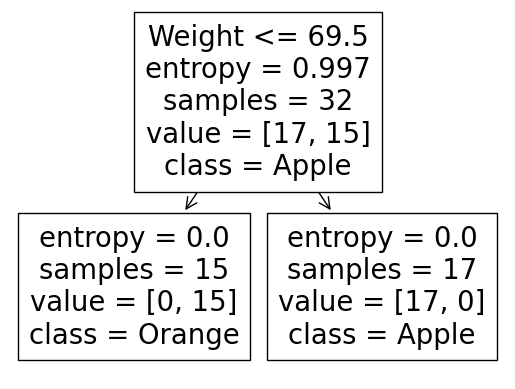

In [17]:
from sklearn.tree import plot_tree as pt
pt(dt,feature_names=["Weight","Size"],class_names=["Apple","Orange"])
# pt(dt)

In [18]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=['Weight','Size']))

|--- Weight <= 69.50
|   |--- class: orange
|--- Weight >  69.50
|   |--- class: apple



In [19]:
from  sklearn.model_selection import GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(),param_grid={'criterion':['gini','entrophy']},scoring='accuracy',cv=5)

In [20]:
model.fit(xtrain,ytrain)

/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/rahul/a

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy']},
             scoring='accuracy')

In [21]:
b

NameError: name 'b' is not defined

In [22]:
model.score(xtest, ytest)

1.0

In [23]:
model.score(xtrain, ytrain)

1.0

In [24]:
from sklearn.tree import export_text
print(export_text(model.best_estimator_,feature_names=['Weight','Size']))

|--- Size <= 4.97
|   |--- class: orange
|--- Size >  4.97
|   |--- class: apple



[Text(0.5, 0.75, 'Size <= 4.97\ngini = 0.498\nsamples = 32\nvalue = [17, 15]\nclass = Apple'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Orange'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = Apple')]

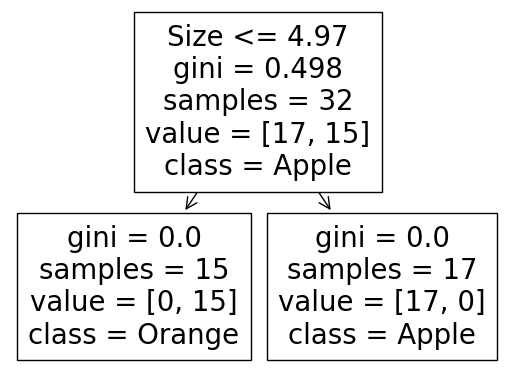

In [25]:
from sklearn.tree import plot_tree as pt
pt(model.best_estimator_,feature_names=["Weight","Size"],class_names=["Apple","Orange"])

In [26]:
ytrain.value_counts()

Class
apple     17
orange    15
Name: count, dtype: int64

In [27]:
import pandas as pd
df=pd.read_csv("BMI.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [28]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['Height','Weight','Gender']], df['Index'],test_size=0.3,random_state=1,shuffle=True)

In [30]:
from sklearn.tree import DecisionTreeClassifier as dt
dt = dt()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
print("training accuracy is ",dt.score(xtrain,ytrain))
print("Test Accuracy =",dt.score(xtest,ytest))

training accuracy is  1.0
Test Accuracy = 0.8733333333333333


[Text(0.6322408536585366, 0.9583333333333334, 'x[1] <= 105.5\ngini = 0.74\nsamples = 350\nvalue = [9, 18, 49, 48, 88, 138]'),
 Text(0.4184451219512195, 0.875, 'x[1] <= 83.5\ngini = 0.793\nsamples = 179\nvalue = [9, 18, 49, 44, 38, 21]'),
 Text(0.17530487804878048, 0.7916666666666666, 'x[0] <= 152.0\ngini = 0.739\nsamples = 105\nvalue = [9, 18, 44, 19, 13, 2]'),
 Text(0.06097560975609756, 0.7083333333333334, 'x[1] <= 66.5\ngini = 0.636\nsamples = 18\nvalue = [0, 0, 1, 7, 8, 2]'),
 Text(0.036585365853658534, 0.625, 'x[1] <= 57.5\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 1, 7, 0, 0]'),
 Text(0.024390243902439025, 0.5416666666666666, 'x[0] <= 145.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.012195121951219513, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.036585365853658534, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.04878048780487805, 0.5416666666666666, 'gini = 0.0\nsamples = 6\nvalue = [

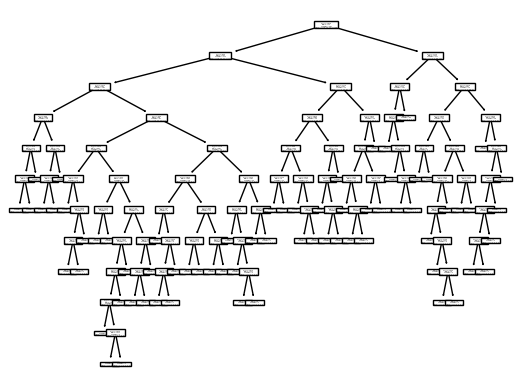

In [32]:
from sklearn.tree import plot_tree as pt
# pt(dt,feature_names=["Weight","Size"],class_names=["Apple","Orange"])
pt(dt)

In [33]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
from sklearn.tree import DecisionTreeClassifier
gv = {'criterion':['gini','entrophy'],'max_depth':[2,3,4,5,6],'max_features':[1,2,3]}
model = GridSearchCV(DecisionTreeClassifier(),param_grid=gv,scoring='accuracy',cv=5)
model.fit(xtrain,ytrain)

/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/rahu

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy')

In [35]:
model.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=3)

In [36]:
print(export_text(model.best_estimator_,feature_names=['Gender','Height','Weight']))

|--- Height <= 105.50
|   |--- Height <= 83.50
|   |   |--- Gender <= 152.00
|   |   |   |--- Height <= 66.50
|   |   |   |   |--- Height <= 57.50
|   |   |   |   |   |--- Weight <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Weight >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Height >  57.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- Height >  66.50
|   |   |   |   |--- Gender <= 141.50
|   |   |   |   |   |--- Weight <= 0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Weight >  0.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- Gender >  141.50
|   |   |   |   |   |--- class: 4
|   |   |--- Gender >  152.00
|   |   |   |--- Height <= 65.50
|   |   |   |   |--- Gender <= 167.50
|   |   |   |   |   |--- Gender <= 162.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Gender >  162.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- Gender >  167.50
|   |   |   |   |   |--- Hei

[Text(0.583984375, 0.9285714285714286, 'x[1] <= 105.5\ngini = 0.74\nsamples = 350\nvalue = [9, 18, 49, 48, 88, 138]'),
 Text(0.365234375, 0.7857142857142857, 'x[1] <= 83.5\ngini = 0.793\nsamples = 179\nvalue = [9, 18, 49, 44, 38, 21]'),
 Text(0.1640625, 0.6428571428571429, 'x[0] <= 152.0\ngini = 0.739\nsamples = 105\nvalue = [9, 18, 44, 19, 13, 2]'),
 Text(0.078125, 0.5, 'x[1] <= 66.5\ngini = 0.636\nsamples = 18\nvalue = [0, 0, 1, 7, 8, 2]'),
 Text(0.046875, 0.35714285714285715, 'x[1] <= 57.5\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 1, 7, 0, 0]'),
 Text(0.03125, 0.21428571428571427, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.015625, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.046875, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(0.109375, 0.35714285714285715, 'x[0] <= 141.5\ngini = 0.

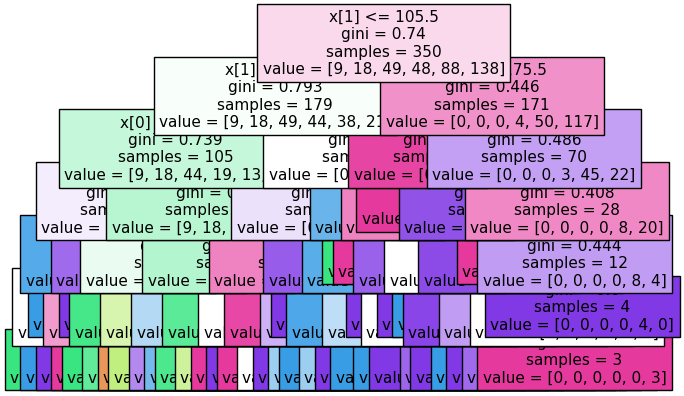

In [37]:
pt(model.best_estimator_,fontsize=11,filled=True)